In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import random

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# reading the data and storing it as app_raw_data
df = pd.read_csv("/Users/angelwadhawan/Documents/WCH/datasets/appendicities.csv")

# reading the data for the paRC score as parc_raw_data
# NEED TO ASK DOCTOR KHURANA FOR THE PARC DATA

In [3]:
raw_data = df.loc[:, ["ID", "Gender", "Temperature", 
                                    "WBC", "CRP", "Operation Performed",
                                    "ANC *1000 (PAS)", "Duration of pain (hours):", "RLQ tenderness",
                                   "RLQ tenderness with cough, percussion or hopping", 
                                  "Guarding", "Rebound Tenderness", "Pain with walking", 
                                  "Migration of pain to RLQ", "Anorexia", "Nausea", 
                                   "Vomiting", "Is patient well or unwell",
                                  "Referred to surgeon ?", "Bedside USS?"]]

### Lets clean up that data so its machine readable

In [4]:
# Lets have a look at the data and see what needs to be fixed

raw_data

,ID,Gender,Temperature,WBC,CRP,Operation Performed,ANC *1000 (PAS),Duration of pain (hours):,RLQ tenderness,"RLQ tenderness with cough, percussion or hopping",Guarding,Rebound Tenderness,Pain with walking,Migration of pain to RLQ,Anorexia,Nausea,Vomiting,Is patient well or unwell,Referred to surgeon ?,Bedside USS?
0,2,Male,≤37.3,11.17,1.5,No,6478.6,24-48,Yes,No,No,No,No,No,Yes,No,No,Well,No,Yes
1,3,Female,≤37.3,6.29,0.3,No,2767.6,48-96,Yes,No,No,No,No,No,Yes,Yes,No,Well,No,No
2,4,Male,≤37.3,6.26,35.7,No,2629.2,24-48,Yes,No,No,No,No,Yes,No,No,No,Well,Yes,No
3,7,Male,≤37.3,NaN,NaN,No,0.0,<24,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Well,Yes,No
4,9,Female,≤37.3,6.72,20.3,No,2956.8,<24,Yes,Yes,Yes,Yes,No,No,No,No,No,Well,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,714,Female,≤37.3,NaN,NaN,NaN,0.0,24-48,Yes,No,No,No,No,No,Yes,No,No,Well,No,No
719,715,Male,≤37.3,7.79,42,Yes,4128.7,24-48,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Well,Yes,No
720,718,Female,37.3 – 37.9,12.86,33.3,Yes,10545.2,24-48,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Well,Yes,Yes
721,719,Male,37.3 – 37.9,8.99,48.1,Yes,5753.6,<24,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Well,Yes,No


In [5]:
# dropping all the null values
raw_data = raw_data.dropna(axis=0)
raw_data.isnull().sum()

ID                                                  0
Gender                                              0
Temperature                                         0
WBC                                                 0
CRP                                                 0
Operation Performed                                 0
ANC *1000 (PAS)                                     0
Duration of pain (hours):                           0
RLQ tenderness                                      0
RLQ tenderness with cough, percussion or hopping    0
Guarding                                            0
Rebound Tenderness                                  0
Pain with walking                                   0
Migration of pain to RLQ                            0
Anorexia                                            0
Nausea                                              0
Vomiting                                            0
Is patient well or unwell                           0
Referred to surgeon ?       

In [6]:
raw_data1 = raw_data.loc[raw_data['Gender'] != 'not specified']
raw_data2 = raw_data1.loc[raw_data1['Duration of pain (hours):']!='unknown  ']
raw_data3 = raw_data2.loc[raw_data2['RLQ tenderness with cough, percussion or hopping']!='Not perfomed']
raw_data4 = raw_data3.loc[raw_data3['Guarding']!='Not performed']
raw_data5 = raw_data4.loc[raw_data4['Rebound Tenderness']!='Not performed']
raw_data6 = raw_data5.loc[raw_data5['Pain with walking']!='Not performed']
raw_data7 = raw_data6.loc[raw_data6['Migration of pain to RLQ']!='Not performed']
unfiltered_data = raw_data7

In [7]:
unfiltered_data

,ID,Gender,Temperature,WBC,CRP,Operation Performed,ANC *1000 (PAS),Duration of pain (hours):,RLQ tenderness,"RLQ tenderness with cough, percussion or hopping",Guarding,Rebound Tenderness,Pain with walking,Migration of pain to RLQ,Anorexia,Nausea,Vomiting,Is patient well or unwell,Referred to surgeon ?,Bedside USS?
0,2,Male,≤37.3,11.17,1.5,No,6478.6,24-48,Yes,No,No,No,No,No,Yes,No,No,Well,No,Yes
1,3,Female,≤37.3,6.29,0.3,No,2767.6,48-96,Yes,No,No,No,No,No,Yes,Yes,No,Well,No,No
2,4,Male,≤37.3,6.26,35.7,No,2629.2,24-48,Yes,No,No,No,No,Yes,No,No,No,Well,Yes,No
4,9,Female,≤37.3,6.72,20.3,No,2956.8,<24,Yes,Yes,Yes,Yes,No,No,No,No,No,Well,No,No
9,15,Male,≥38,21.50,34,No,17200.0,<24,No,No,No,No,No,No,Yes,Yes,Yes,Well,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,712,Male,≤37.3,12.38,27.6,No,10399.2,<24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Unwell,Yes,No
719,715,Male,≤37.3,7.79,42,Yes,4128.7,24-48,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Well,Yes,No
720,718,Female,37.3 – 37.9,12.86,33.3,Yes,10545.2,24-48,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Well,Yes,Yes
721,719,Male,37.3 – 37.9,8.99,48.1,Yes,5753.6,<24,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Well,Yes,No


In [8]:
# Lets create a mapping function to map different values of the column
# and do the same for other columns
filtered_data = unfiltered_data
gender_mapping = {'Male' : 0, 'Female' : 1}
filtered_data['Gender'] = unfiltered_data['Gender'].map(gender_mapping)

filtered_data['Temperature'] = unfiltered_data['Temperature'].str.replace('≤', '')
filtered_data['Temperature'] = unfiltered_data['Temperature'].str.replace('≥', '')
filtered_data['Temperature'] = unfiltered_data['Temperature'].str.replace('37.3 – 37.9', '37.6', regex=True)

# converting the colunn to float values
filtered_data['Temperature'] = unfiltered_data['Temperature'].astype(float)

# next we move on to Opertion performed and we do the same steps
# look at the unique values and go from there
operation_mapping = {'No' : 0, 'Yes': 1}
filtered_data['Operation Performed'] = unfiltered_data['Operation Performed'].map(operation_mapping)

filtered_data['Duration of pain (hours):'] = unfiltered_data['Duration of pain (hours):'].str.replace('<', '')
filtered_data['Duration of pain (hours):'] = unfiltered_data['Duration of pain (hours):'].str.replace('>', '')
filtered_data['Duration of pain (hours):'] = unfiltered_data['Duration of pain (hours):'].str.replace('24-48', '36', regex=True)
filtered_data['Duration of pain (hours):'] = unfiltered_data['Duration of pain (hours):'].str.replace('48-96', '72', regex=True)

# converting the colunn to float values
filtered_data['Duration of pain (hours):'] = unfiltered_data['Duration of pain (hours):'].astype(float)

# we move on to RLQ Tenderness
rlq_mapping = {'Yes' : 1, 'No' : 0}
filtered_data['RLQ tenderness'] = unfiltered_data['RLQ tenderness'].map(rlq_mapping)

filtered_data['RLQ tenderness with cough, percussion or hopping'] = unfiltered_data['RLQ tenderness with cough, percussion or hopping'].map(rlq_mapping)

filtered_data['Guarding'] = unfiltered_data['Guarding'].map(rlq_mapping)

filtered_data['Rebound Tenderness'] = unfiltered_data['Rebound Tenderness'].map(rlq_mapping)

filtered_data['Pain with walking'] = unfiltered_data['Pain with walking'].map(rlq_mapping)

filtered_data['Migration of pain to RLQ'] = unfiltered_data['Migration of pain to RLQ'].map(rlq_mapping)

filtered_data['Anorexia'] = unfiltered_data['Anorexia'].map(rlq_mapping)

filtered_data['Nausea'] = unfiltered_data['Nausea'].map(rlq_mapping)

filtered_data['Vomiting'] = unfiltered_data['Vomiting'].map(rlq_mapping)

patient_mapping = {'Well' : 0, 'Unwell' : 1, 'unwell': 1}
filtered_data['Is patient well or unwell'] = unfiltered_data['Is patient well or unwell'].map(patient_mapping)

filtered_data['Referred to surgeon ?'] = unfiltered_data['Referred to surgeon ?'].map(rlq_mapping)

filtered_data['Bedside USS?'] = unfiltered_data['Bedside USS?'].map(rlq_mapping)

filtered_data['CRP'] = unfiltered_data['CRP'].str.replace('<', '')


/var/folders/v2/9ht10r117h95prm7wmgwb5t80000gn/T/ipykernel_17314/3324032896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Gender'] = unfiltered_data['Gender'].map(gender_mapping)
/var/folders/v2/9ht10r117h95prm7wmgwb5t80000gn/T/ipykernel_17314/3324032896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Temperature'] = unfiltered_data['Temperature'].str.replace('≤', '')
/var/folders/v2/9ht10r117h95prm7wmgwb5t80000gn/T/ipykernel_17314/3324032896.py:8: SettingWithCopyWarn

In [9]:
# lets have another look at the subjective data and see how it has changed
filtered_data.shape

(463, 20)

### As we can see the raw data now looks much better and machine readable.
### Time to do some data analysis on this

In [10]:
filtered_data.describe()

,ID,Gender,Temperature,WBC,Operation Performed,ANC *1000 (PAS),Duration of pain (hours):,RLQ tenderness,"RLQ tenderness with cough, percussion or hopping",Guarding,Rebound Tenderness,Pain with walking,Migration of pain to RLQ,Anorexia,Nausea,Vomiting,Is patient well or unwell,Referred to surgeon ?,Bedside USS?
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.00000,463.000000
mean,373.209503,0.529158,37.456587,10.482181,0.375810,7296.749784,46.885529,0.915767,0.600432,0.390929,0.317495,0.466523,0.453564,0.606911,0.637149,0.393089,0.084233,0.49676,0.269978
std,219.379076,0.499689,0.266440,4.903362,0.484855,4813.588791,25.271553,0.278038,0.490339,0.488486,0.466005,0.499418,0.498377,0.488965,0.481342,0.488965,0.278038,0.50053,0.444428
min,2.000000,0.000000,37.300000,1.430000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,191.500000,0.000000,37.300000,6.870000,0.000000,3730.200000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,338.000000,1.000000,37.300000,9.040000,0.000000,5715.600000,36.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,567.000000,1.000000,37.600000,13.250000,1.000000,10050.950000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000
max,725.000000,1.000000,38.000000,29.000000,1.000000,25640.400000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [11]:
# Now we will separate out the labels
clustering_data = filtered_data.drop(["ID", "Operation Performed"], axis=1)

In [12]:
clustering_data

,Gender,Temperature,WBC,CRP,ANC *1000 (PAS),Duration of pain (hours):,RLQ tenderness,"RLQ tenderness with cough, percussion or hopping",Guarding,Rebound Tenderness,Pain with walking,Migration of pain to RLQ,Anorexia,Nausea,Vomiting,Is patient well or unwell,Referred to surgeon ?,Bedside USS?
0,0,37.3,11.17,1.5,6478.6,36.0,1,0,0,0,0,0,1,0,0,0,0,1
1,1,37.3,6.29,0.3,2767.6,72.0,1,0,0,0,0,0,1,1,0,0,0,0
2,0,37.3,6.26,35.7,2629.2,36.0,1,0,0,0,0,1,0,0,0,0,1,0
4,1,37.3,6.72,20.3,2956.8,24.0,1,1,1,1,0,0,0,0,0,0,0,0
9,0,38.0,21.50,34,17200.0,24.0,0,0,0,0,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0,37.3,12.38,27.6,10399.2,24.0,1,1,1,0,1,1,1,1,1,1,1,0
719,0,37.3,7.79,42,4128.7,36.0,1,1,1,0,1,1,0,1,0,0,1,0
720,1,37.6,12.86,33.3,10545.2,36.0,1,0,0,0,0,1,1,1,1,0,1,1
721,0,37.6,8.99,48.1,5753.6,24.0,1,1,0,0,1,0,0,1,1,0,1,0


In [13]:
# lets do another check for null values
clustering_data.isnull().sum()

Gender                                              0
Temperature                                         0
WBC                                                 0
CRP                                                 0
ANC *1000 (PAS)                                     0
Duration of pain (hours):                           0
RLQ tenderness                                      0
RLQ tenderness with cough, percussion or hopping    0
Guarding                                            0
Rebound Tenderness                                  0
Pain with walking                                   0
Migration of pain to RLQ                            0
Anorexia                                            0
Nausea                                              0
Vomiting                                            0
Is patient well or unwell                           0
Referred to surgeon ?                               0
Bedside USS?                                        0
dtype: int64

# Kmeans Clustering

In [14]:
# We create a grid for all the differnt paramaters that are/can be used in Kmeans
param_grid = {
    'n_clusters' : [2, 5, 10, 20],
    'init' : ['k-means++', 'random'],
    'n_init' : [10, 20, 30]
}

# creating the model
kmeans = KMeans()

# Perform the grid search
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(clustering_data)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'n_clusters': [2, 5, 10, 20], 'n_init': [10, 20, 30]})

In [15]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'init': 'k-means++', 'n_clusters': 20, 'n_init': 30}


In [16]:
# get the best estimator and calculate the inertia
best_estimator = grid_search.best_estimator_

inertia = best_estimator.inertia_
print(inertia)

36752090.94557431


In [17]:
# this does not give us a comparative idea of how our model stands
# lets run the model with different number of clusters and plot and elbow curve

clusters = [2, 5, 10, 20, 30, 40]
inertias = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster).fit(clustering_data)
    inertias.append(kmeans.inertia_)

[3095595504.568816, 623819312.0205612, 160723995.64144716, 36831099.094062224, 15029843.550046662, 7986849.793602407]


Text(0, 0.5, 'sum of squared distance')

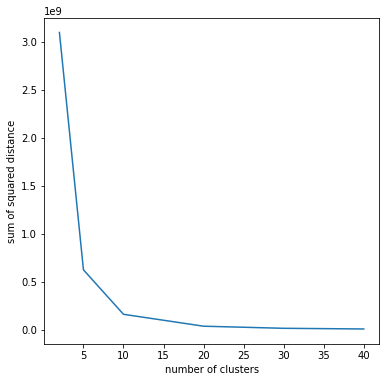

In [18]:
# Print the inertias and plot the elbow curve
print(inertias)

plt.figure(figsize=(6, 6))
plt.plot(clusters, inertias)
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distance')

In [19]:
# We can see from the above that the ideal number of clusters
# is 10 for our dataset.

# Now we will add the cluster number to the data
kmeans = KMeans(n_clusters=10).fit(clustering_data)
y_clustering = kmeans.labels_
clustering_data['Cluster'] = y_clustering
clustering_data

,Gender,Temperature,WBC,CRP,ANC *1000 (PAS),Duration of pain (hours):,RLQ tenderness,"RLQ tenderness with cough, percussion or hopping",Guarding,Rebound Tenderness,Pain with walking,Migration of pain to RLQ,Anorexia,Nausea,Vomiting,Is patient well or unwell,Referred to surgeon ?,Bedside USS?,Cluster
0,0,37.3,11.17,1.5,6478.6,36.0,1,0,0,0,0,0,1,0,0,0,0,1,5
1,1,37.3,6.29,0.3,2767.6,72.0,1,0,0,0,0,0,1,1,0,0,0,0,4
2,0,37.3,6.26,35.7,2629.2,36.0,1,0,0,0,0,1,0,0,0,0,1,0,4
4,1,37.3,6.72,20.3,2956.8,24.0,1,1,1,1,0,0,0,0,0,0,0,0,0
9,0,38.0,21.50,34,17200.0,24.0,0,0,0,0,0,0,1,1,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0,37.3,12.38,27.6,10399.2,24.0,1,1,1,0,1,1,1,1,1,1,1,0,7
719,0,37.3,7.79,42,4128.7,36.0,1,1,1,0,1,1,0,1,0,0,1,0,0
720,1,37.6,12.86,33.3,10545.2,36.0,1,0,0,0,0,1,1,1,1,0,1,1,7
721,0,37.6,8.99,48.1,5753.6,24.0,1,1,0,0,1,0,0,1,1,0,1,0,8


In [20]:
# Makiing a correlation Matrix and a Heatmap
# We will drop the ID column
temp_data = filtered_data.drop('ID', axis=1)
correlation_matrix = temp_data.corr()
print(correlation_matrix.shape)

(18, 18)


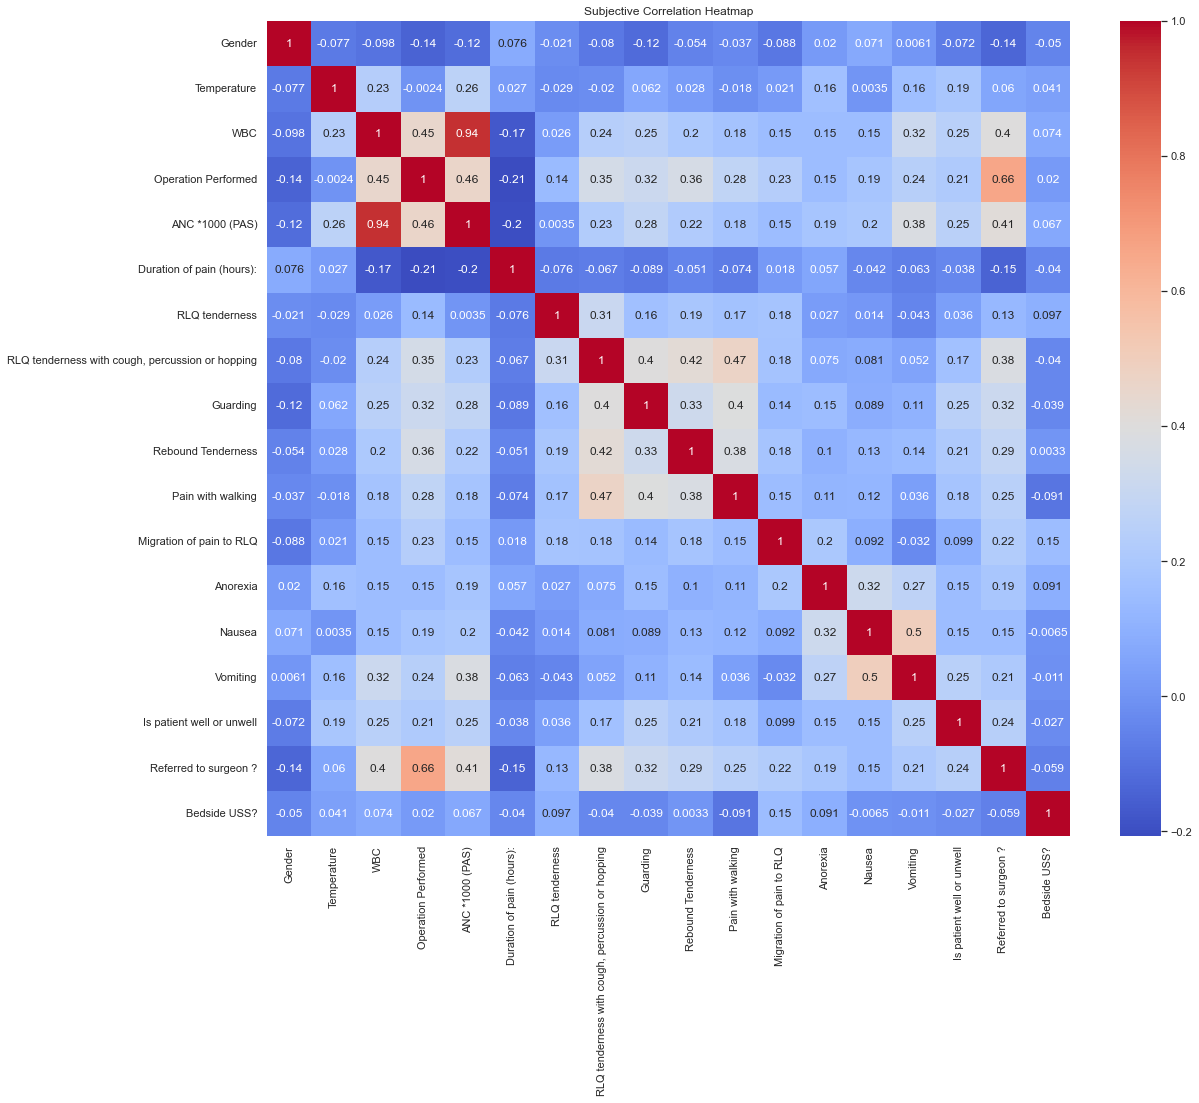

In [21]:
sns.set(rc={'figure.figsize':(18,15)})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Subjective Correlation Heatmap')
plt.show()

### Importing the pAARC data

In [22]:
raw_parc = pd.read_csv("/Users/angelwadhawan/Documents/WCH/datasets/Appendicitis Risk Calculation Data Clean OCT23.csv")
filter_raw_parc = raw_parc.loc[:, ["ID", "Init. Risk", "pARC predicted probability"]]

In [23]:
filter_raw_parc = filter_raw_parc.dropna(axis=0)

In [24]:
filter_raw_parc.isnull().sum()

ID                            0
Init. Risk                    0
pARC predicted probability    0
dtype: int64

In [25]:
merge_df = pd.merge(filtered_data, filter_raw_parc, on='ID')

In [26]:
merge_df.isnull().sum()

ID                                                  0
Gender                                              0
Temperature                                         0
WBC                                                 0
CRP                                                 0
Operation Performed                                 0
ANC *1000 (PAS)                                     0
Duration of pain (hours):                           0
RLQ tenderness                                      0
RLQ tenderness with cough, percussion or hopping    0
Guarding                                            0
Rebound Tenderness                                  0
Pain with walking                                   0
Migration of pain to RLQ                            0
Anorexia                                            0
Nausea                                              0
Vomiting                                            0
Is patient well or unwell                           0
Referred to surgeon ?       

## Splitting the data for supervised learning

In [27]:
# Splitting the data into training and testing set 
train, test = train_test_split(merge_df, test_size=0.2, random_state=42)

X_train = train.drop(columns=['Operation Performed', 'Init. Risk', 'pARC predicted probability'])
y_train = train["Operation Performed"]
parc_risk_train = train['Init. Risk']
parc_outcome_train = train["pARC predicted probability"]

X_test = test.drop(columns=['Operation Performed', 'Init. Risk', 'pARC predicted probability'])
y_test = test["Operation Performed"]
parc_risk_test = test['Init. Risk']
parc_outcome_test = test["pARC predicted probability"]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(356, 19) (356,) (90, 19) (90,)


In [28]:
# function that prints different scores for the model prediction
def get_scores(y_test, y_pred_test):

    # getting the confusion matrix
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_test).ravel()

    # printing out the parameters that we need
    print("Sensitivity is: " + str((tp/(tp+fn))))
    print("Specificity is: " + str((tn/(tn+fp))))
    print("Positive predictive value is: " + str((tp/(tp+fp))))
    print("Accuracy is: " + str((tn/(tn+fn))))

# Random Forest Classifier

### A default Random forest classifier

In [29]:
# default rf classifier
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Predicting the Y values for the test
y_pred_default_rf = rf.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred_default_rf))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        52
           1       0.85      0.74      0.79        38

    accuracy                           0.83        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.83      0.83      0.83        90



In [33]:
get_scores(y_test, y_pred_default_rf)

Sensitivity is: 0.7368421052631579
Specificity is: 0.9038461538461539
Positive predictive value is: 0.8484848484848485
Accuracy is: 0.8245614035087719


In [34]:
fp, tp, thresholdS = metrics.roc_curve(y_test, y_pred_default_rf)
roc_auc_default_rf = metrics.auc(fp, tp)
print("The area under the curve for the default classifier is: ", roc_auc_default_rf)

The area under the curve for the default classifier is:  0.8203441295546559


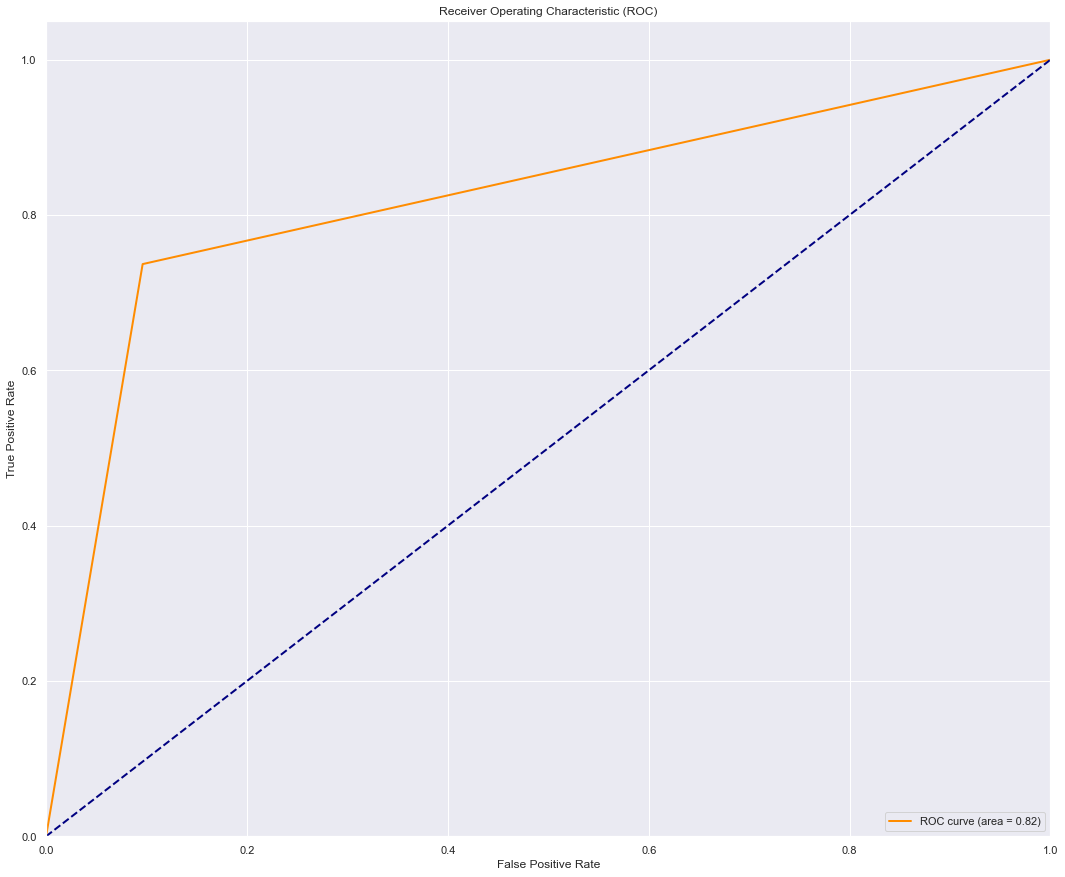

In [35]:
plt.figure()
plt.plot(fp, tp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_default_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Evaluation criterion
To evaluate our Random Forest model we will use the following pointers
  - Precision: Precision is the number of correctly-identified members of a class divided by all the times the model predicted that class.
 
 - Recall: Recall is the number of members of a class that the classifier identified correctly divided by the total number of members in that class.

 - F1 score: F1 score is a little less intuitive because it combines precision and recall into one metric. If precision and recall are both high, F1 will be high, too.

### some other parameters that we are going to use are :
- confusion matrix: to get the true positive, false positive, true negative and false negative values

- sensitivity

- specificity

- positive predictive value

- accuracy

### Now we will create a Random forest classifier using hyperparameter optimization and cross validation

In [36]:
# Number of trees in random forest
n_estimators = [100, 200, 300]

criterion = ['gini', 'entropy']

# Number of features to consider at every split
max_features = ['auto', None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
            #    'bootstrap': bootstrap
               }

In [37]:
random_grid

{'n_estimators': [100, 200, 300],
 'criterion': ['gini', 'entropy'],
 'max_features': ['auto', None],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2]}

In [38]:
# now we use the above dictionary to get the best out of our random forest
rf = RandomForestClassifier(oob_score=False)

# we will use the 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, 
                               n_iter=100, cv = 3, 
                               random_state=42, 
                               n_jobs=-1, error_score='raise') # this parametes means the number of threads, -1 = use all processors

In [39]:
# THIS CODE TAKES TOO LONG TO RUN
rf_random.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [40]:
best_estimator_rf = rf_random.best_estimator_

In [41]:
print("These are the best parameters that we should use fro our random forest classifier")
(best_estimator_rf.get_params())

These are the best parameters that we should use fro our random forest classifier


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Evaluation of the model

In [42]:
# check the cv reaults
print(rf_random.cv_results_)

{'mean_fit_time': array([0.15331443, 0.15301212, 0.23984845, 0.07702049, 0.13992198,
       0.21972537, 0.07597804, 0.15049879, 0.21401358, 0.06748478,
       0.15022596, 0.22090904, 0.09086498, 0.17925596, 0.32481559,
       0.08206407, 0.17884556, 0.28851096, 0.09037391, 0.1704243 ,
       0.26386007, 0.09397928, 0.18331544, 0.27456578, 0.07307466,
       0.1745429 , 0.21803411, 0.07308714, 0.15718675, 0.19738301,
       0.08730666, 0.14555105, 0.22289515, 0.07284633, 0.14978838,
       0.21683963, 0.1068941 , 0.20586252, 0.27710112, 0.11039718,
       0.21108047, 0.30443629, 0.09470447, 0.19468896, 0.28613838,
       0.09943326, 0.18895483, 0.23192573]), 'std_fit_time': array([0.05256423, 0.0043829 , 0.00404722, 0.00202229, 0.00613265,
       0.02060517, 0.00656576, 0.01314492, 0.02115783, 0.004306  ,
       0.00889243, 0.02342666, 0.01710446, 0.00722911, 0.06388314,
       0.00638908, 0.00462513, 0.00565715, 0.00995739, 0.00961343,
       0.01543809, 0.00496983, 0.0060422 , 0.03518

In [43]:
y_pred_random_rf = best_estimator_rf.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred_random_rf))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        52
           1       0.84      0.71      0.77        38

    accuracy                           0.82        90
   macro avg       0.83      0.81      0.81        90
weighted avg       0.82      0.82      0.82        90



In [45]:
get_scores(y_test, y_pred_random_rf)

Sensitivity is: 0.7105263157894737
Specificity is: 0.9038461538461539
Positive predictive value is: 0.84375
Accuracy is: 0.8103448275862069


In [46]:
fp, tp, thresholdS = metrics.roc_curve(y_test, y_pred_random_rf)
roc_auc_random_rf = metrics.auc(fp, tp)
print("The area under the curve is: ", roc_auc_random_rf)

The area under the curve is:  0.8071862348178137


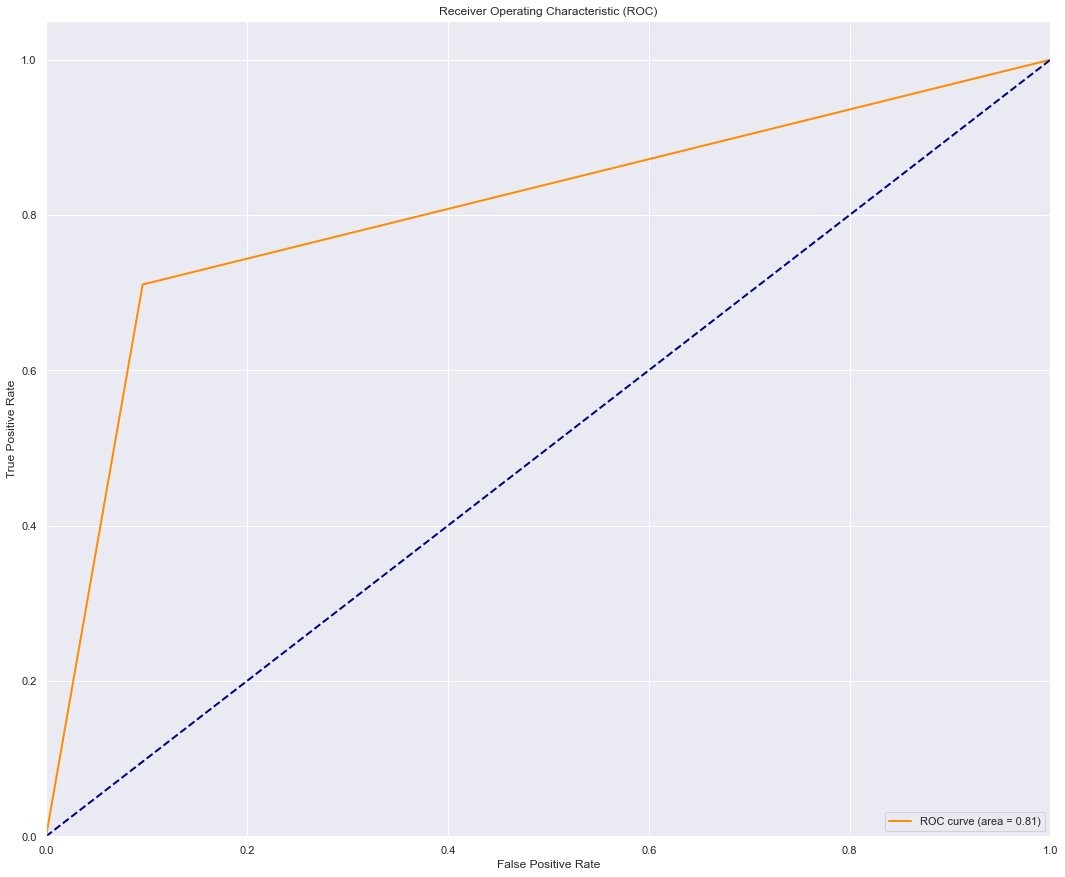

In [47]:
plt.figure()
plt.plot(fp, tp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_random_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Training the best estimator again on the complete dataset because we have less data to work with

In [48]:
best_estimator_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [49]:
y_pred_best_rf = best_estimator_rf.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        52
           1       0.85      0.74      0.79        38

    accuracy                           0.83        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.83      0.83      0.83        90



In [51]:
get_scores(y_test, y_pred_best_rf)

Sensitivity is: 0.7368421052631579
Specificity is: 0.9038461538461539
Positive predictive value is: 0.8484848484848485
Accuracy is: 0.8245614035087719


In [52]:
fp, tp, thresholdS = metrics.roc_curve(y_test, y_pred_best_rf)
roc_auc_best_rf = metrics.auc(fp, tp)
print("The area under the curve is: ", roc_auc_best_rf)

The area under the curve is:  0.8203441295546559


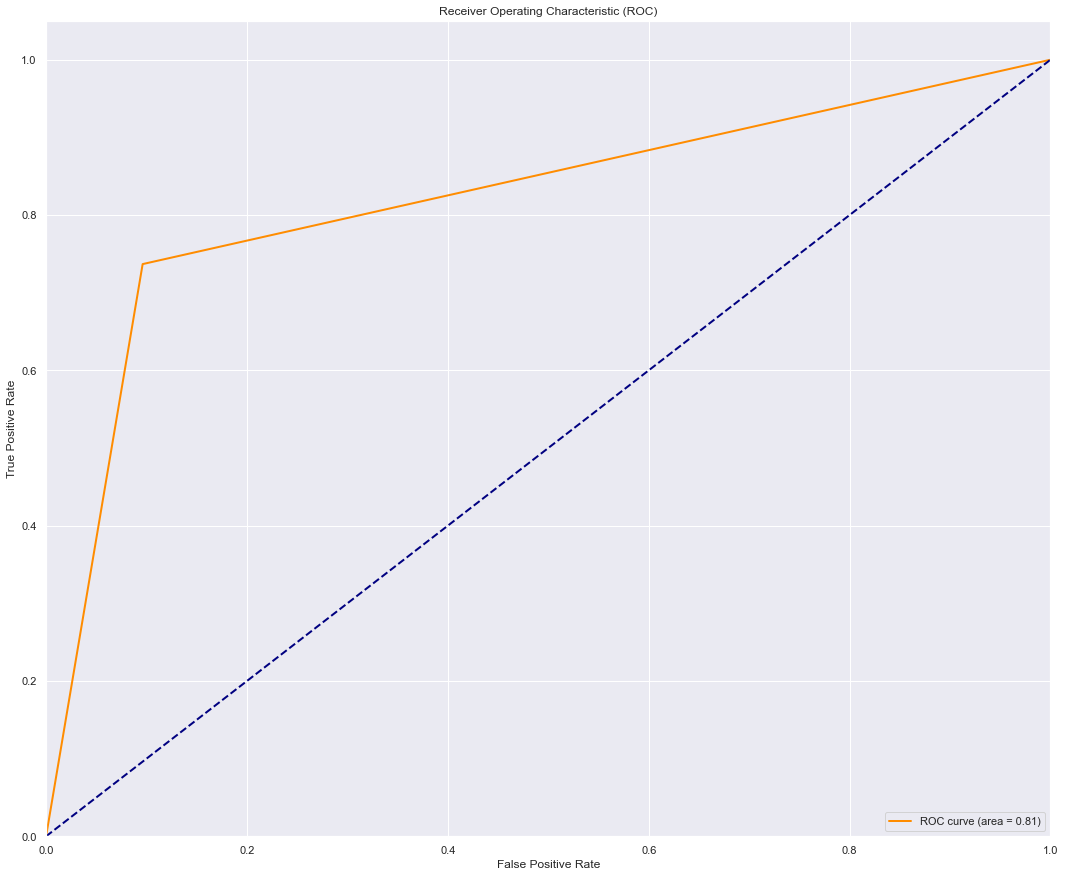

In [53]:
plt.figure()
plt.plot(fp, tp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_random_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Using Support Vector Machine (SVM)

In [54]:
# using a dafault svm to have a baseline
default_svm = SVC()

In [55]:
default_svm_estimator = default_svm.fit(X_train, y_train)

In [56]:
default_svm_estimator.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [57]:
y_pred_default_svm = default_svm_estimator.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred_default_svm))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78        52
           1       0.73      0.50      0.59        38

    accuracy                           0.71        90
   macro avg       0.72      0.68      0.68        90
weighted avg       0.71      0.71      0.70        90



In [59]:
get_scores(y_test, y_pred_default_svm)

Sensitivity is: 0.5
Specificity is: 0.8653846153846154
Positive predictive value is: 0.7307692307692307
Accuracy is: 0.703125


In [60]:
fp, tp, threshold = metrics.roc_curve(y_test, y_pred_default_svm)
roc_auc_default_svm = metrics.auc(fp, tp)
print("The area under the curve is: ", roc_auc_default_svm)

The area under the curve is:  0.6826923076923077


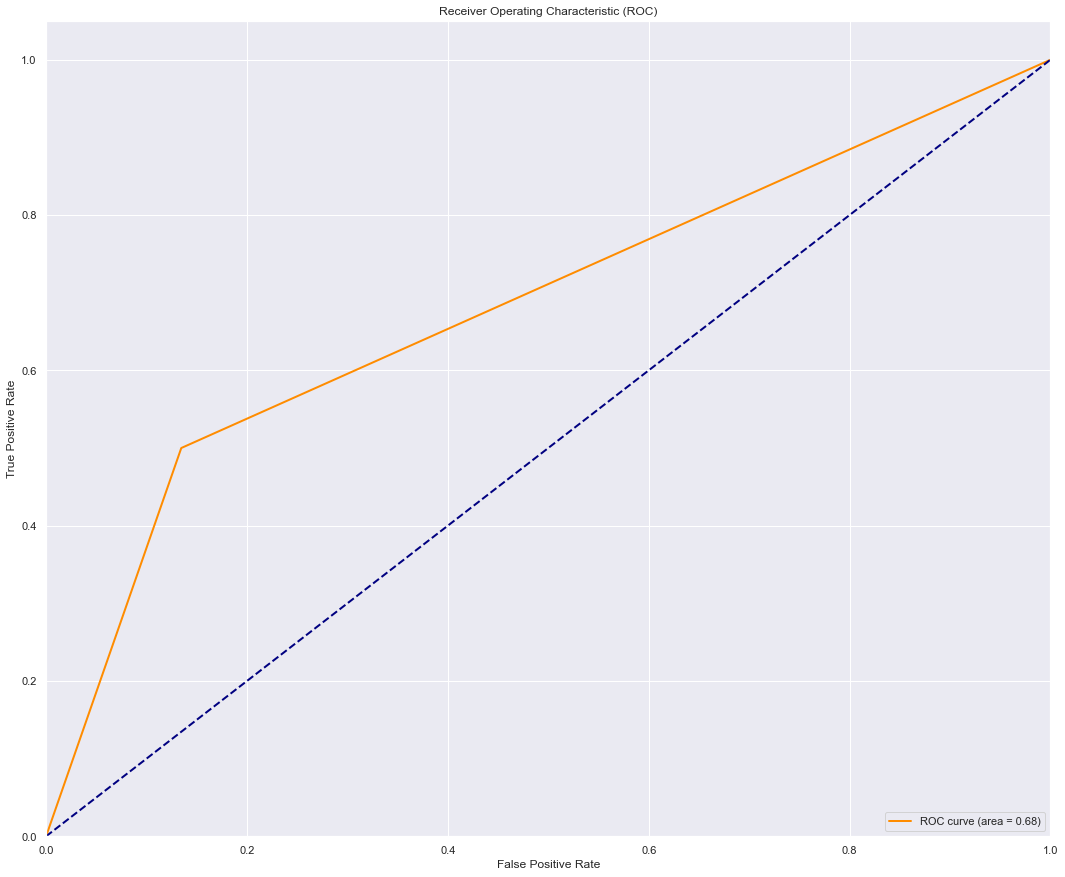

In [61]:
plt.figure()
plt.plot(fp, tp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_default_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Now we will perform hyperparameter analysis

In [62]:
kernels = ['sigmoid', 'rbf']
gammas = ['scale', 'auto']
class_weights = ['balanced']
random_grid = {
    'kernel' : kernels,
    'gamma' : gammas,
    'class_weight' : class_weights,
}
random_grid

{'kernel': ['sigmoid', 'rbf'],
 'gamma': ['scale', 'auto'],
 'class_weight': ['balanced']}

In [63]:
svm = SVC()

svm_random = RandomizedSearchCV(estimator=svm, 
                                param_distributions=random_grid,
                                n_iter=100, cv=3,
                                random_state=42,
                                n_jobs=-1)

In [64]:
# DO NOT RUN THIS AS IT CAUSES OVERFLOW OF APPLICATION MEMORY
#svm_random.fit(X_train, y_train)

### Bacause the CV search for SVM was overflowing the app memory, we will perfrom the best classification manually

In [65]:
estimators = {}
for kernel in kernels:
    for gamma in gammas:
        svm = SVC(kernel = kernel, gamma=gamma, class_weight='balanced')
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        estimators[svm] = score
        print(kernel, gamma)
        print("Score: " + str(score))

sigmoid scale
Score: 0.45555555555555555
sigmoid auto
Score: 0.4222222222222222
rbf scale
Score: 0.7222222222222222
rbf auto
Score: 0.5777777777777777


In [66]:
best_estimator_svm = max(estimators, key=estimators.get)
best_estimator_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [67]:
y_pred_best_svm = best_estimator_svm.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred_best_svm))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        52
           1       0.70      0.61      0.65        38

    accuracy                           0.72        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.72      0.72      0.72        90



In [69]:
get_scores(y_test, y_pred_best_svm)

Sensitivity is: 0.6052631578947368
Specificity is: 0.8076923076923077
Positive predictive value is: 0.696969696969697
Accuracy is: 0.7368421052631579


In [70]:
fp, tp, threshold = metrics.roc_curve(y_test, y_pred_best_svm)
roc_auc_best_svm = metrics.auc(fp, tp)
print("The area under the curve is: ", roc_auc_best_svm)

The area under the curve is:  0.7064777327935222


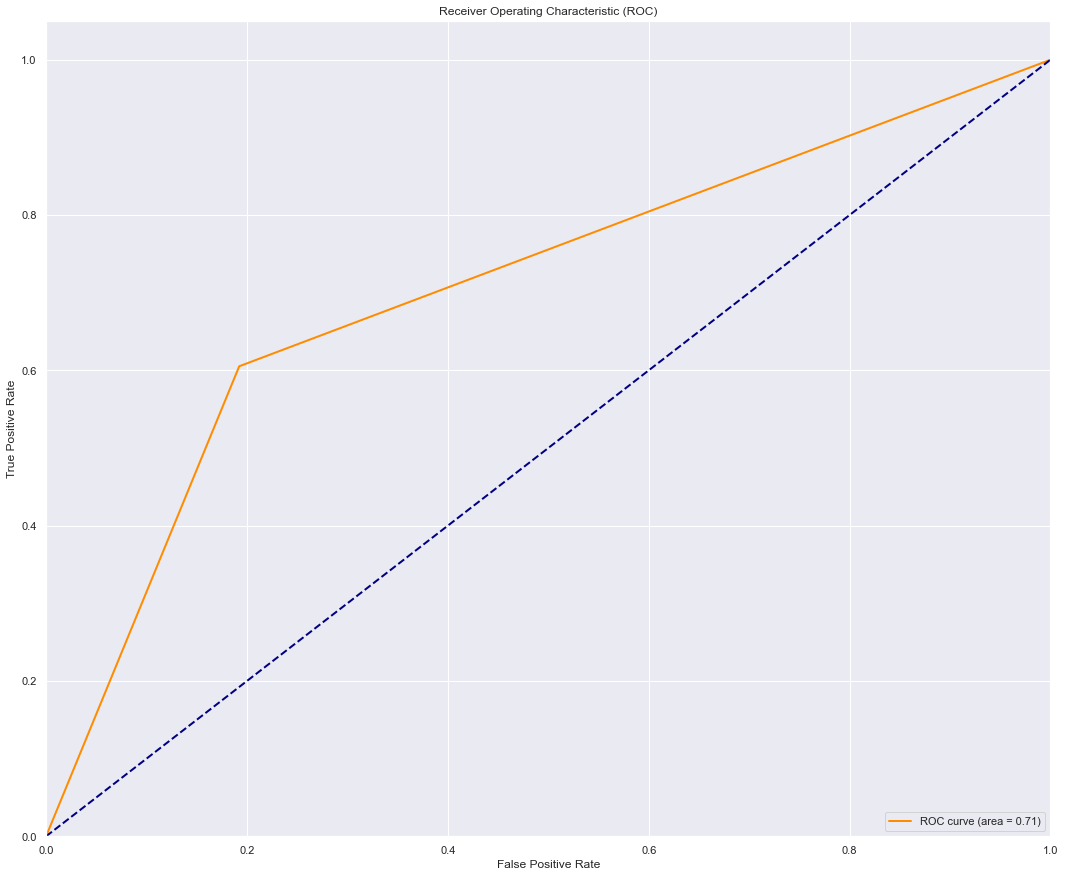

In [71]:
plt.figure()
plt.plot(fp, tp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Here we can see that the default result is better than the optimized results, however there is a major issue in them.

The labels in the data are highly imbalanced, so we use balanced class weights in the calculation of all the optimized results, thus, the accuracy goes down

# Complement Naive Bayes 

We are going to use ComplementNB implements. The complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB

In [72]:
# running the default model
nb = ComplementNB()

nb_default = nb.fit(X_train, y_train)

In [73]:
# getting the default prediction
y_pred_default_nb = nb_default.predict(X_test)

In [74]:
y_pred_default_nb

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1])

In [75]:
print(classification_report(y_test, y_pred_default_nb))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        52
           1       0.53      0.63      0.58        38

    accuracy                           0.61        90
   macro avg       0.61      0.61      0.61        90
weighted avg       0.62      0.61      0.61        90



In [76]:
get_scores(y_test, y_pred_default_nb)

Sensitivity is: 0.631578947368421
Specificity is: 0.5961538461538461
Positive predictive value is: 0.5333333333333333
Accuracy is: 0.6888888888888889


In [77]:
fp, tp, threshold = metrics.roc_curve(y_test, y_pred_default_nb)
roc_auc_default_nb = metrics.auc(fp, tp)
print("The area under the curve is: ", roc_auc_default_nb)

The area under the curve is:  0.6138663967611335


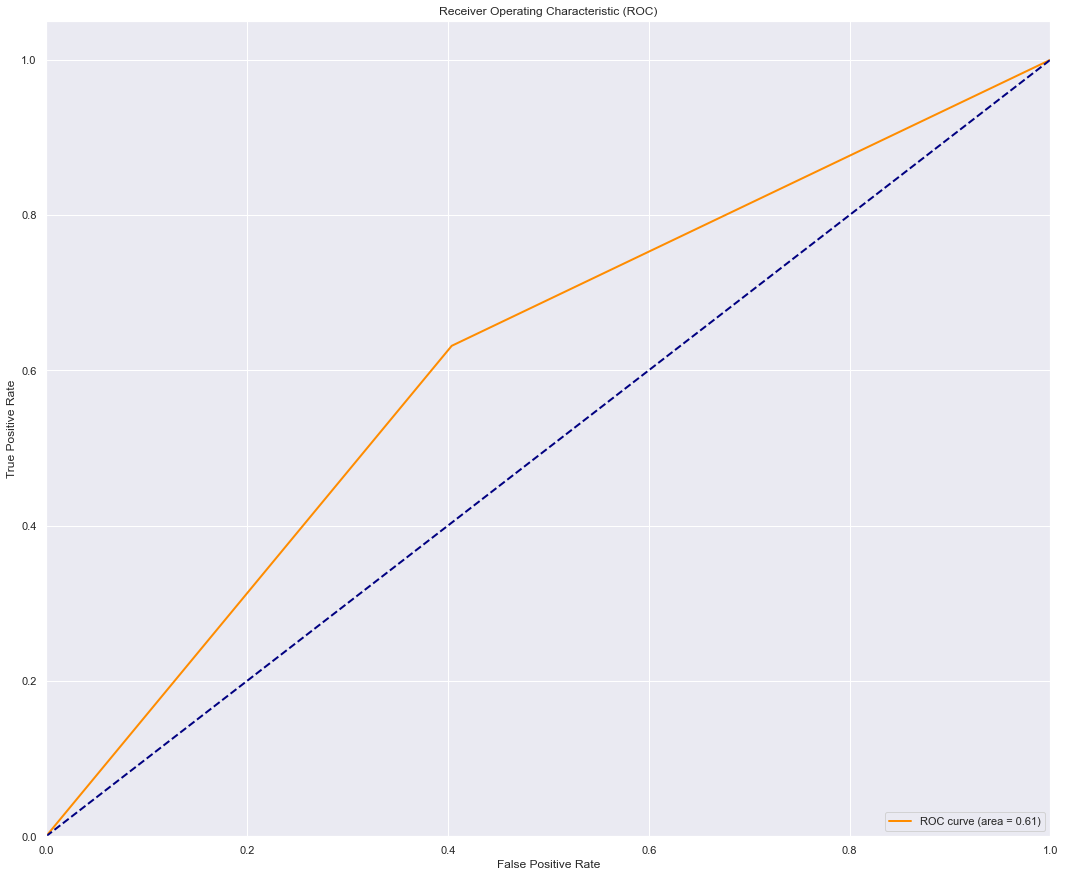

In [78]:
plt.figure()
plt.plot(fp, tp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_default_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

The complement naive abayes algorithm doesn't have any optimizable parameters so will skip the hyperparameter optimization and analysis for this model

# Regression : Logistic Regression


we can't use regression in this analysis as we do not have contionus values.
This is the age old classification vs regression problem.

The problem at hand here is a classification problem.

To tackle we perfrom the logistic regression that is a classification model

In [79]:
# default logistic regression model
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_default_lr = lr.predict(X_test)


/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
print(classification_report(y_test, y_pred_default_lr))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        52
           1       0.79      0.79      0.79        38

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



In [81]:
get_scores(y_test, y_pred_default_lr)

Sensitivity is: 0.7894736842105263
Specificity is: 0.8461538461538461
Positive predictive value is: 0.7894736842105263
Accuracy is: 0.8461538461538461


In [82]:
fp, tp, threshold = metrics.roc_curve(y_test, y_pred_default_lr)
roc_auc_default_lr = metrics.auc(fp, tp)
print("The area under the curve is: ", roc_auc_default_lr)

The area under the curve is:  0.8178137651821863


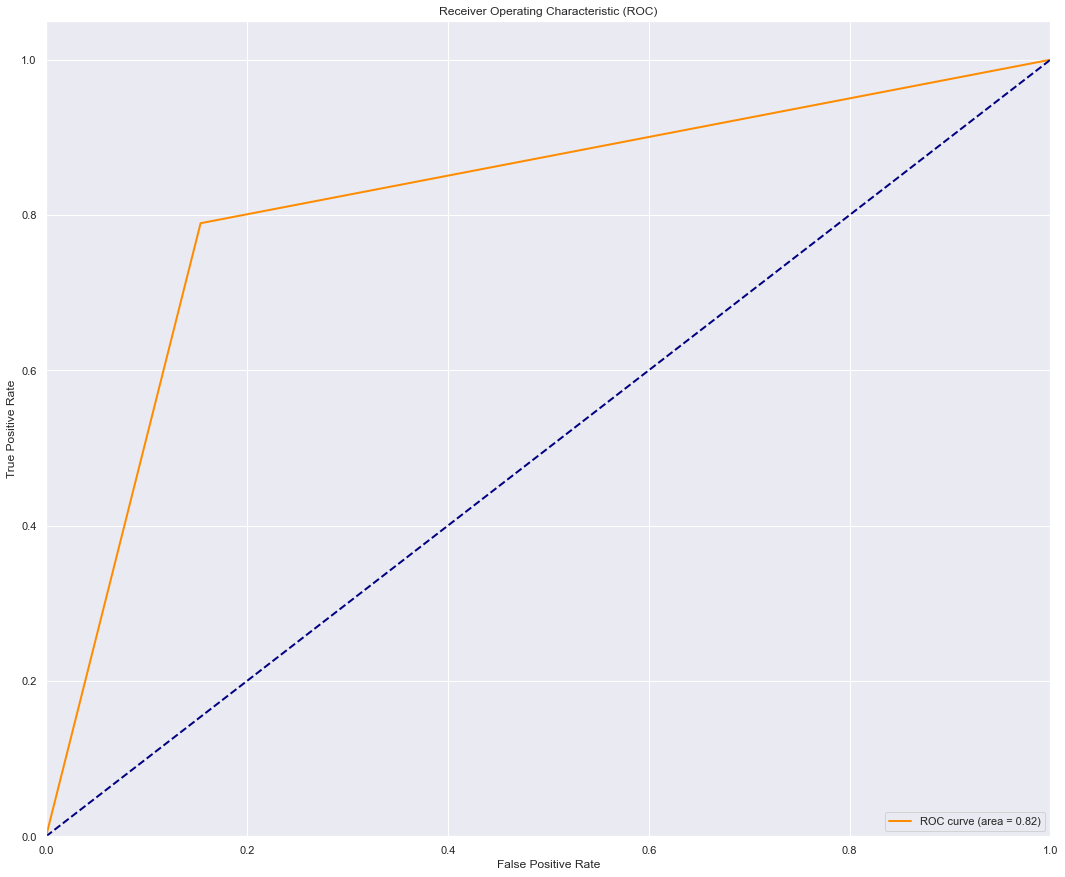

In [83]:
plt.figure()
plt.plot(fp, tp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_default_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Now we look at the hyper parameter optimization and analysis for this logistic regression model

In [84]:
# creating a dict for the different types of parameters used
class_weight = ['balanced', None]
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
multi_class = ['auto', 'ovr', 'multinomial']

random_grid = {'class_weight' : class_weight,
               'solver' : solver,
               'multi_class' : multi_class}

In [85]:
lr = LogisticRegression()

lr_random = RandomizedSearchCV(estimator=lr,
                               param_distributions=random_grid,
                               n_iter=100, cv=3,
                               random_state=42,
                               n_jobs=-1)

In [86]:
lr_random.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/linear_mod

/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchW

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'solver': ['newton-cg', 'sag', 'saga',
                                                   'lbfgs']},
                   random_state=42)

In [87]:
best_lr = lr_random.best_estimator_

y_pred_random_lr = best_lr.predict(X_test)

In [88]:
best_lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [89]:
print(classification_report(y_test, y_pred_random_lr))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        52
           1       0.85      0.74      0.79        38

    accuracy                           0.83        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.83      0.83      0.83        90



In [90]:
get_scores(y_test, y_pred_random_lr)

Sensitivity is: 0.7368421052631579
Specificity is: 0.9038461538461539
Positive predictive value is: 0.8484848484848485
Accuracy is: 0.8245614035087719


In [91]:
fp, tp, threshold = metrics.roc_curve(y_test, y_pred_random_lr)
roc_auc_random_lr = metrics.auc(fp, tp)
print("The area under the curve is: ", roc_auc_random_lr)

The area under the curve is:  0.8203441295546559


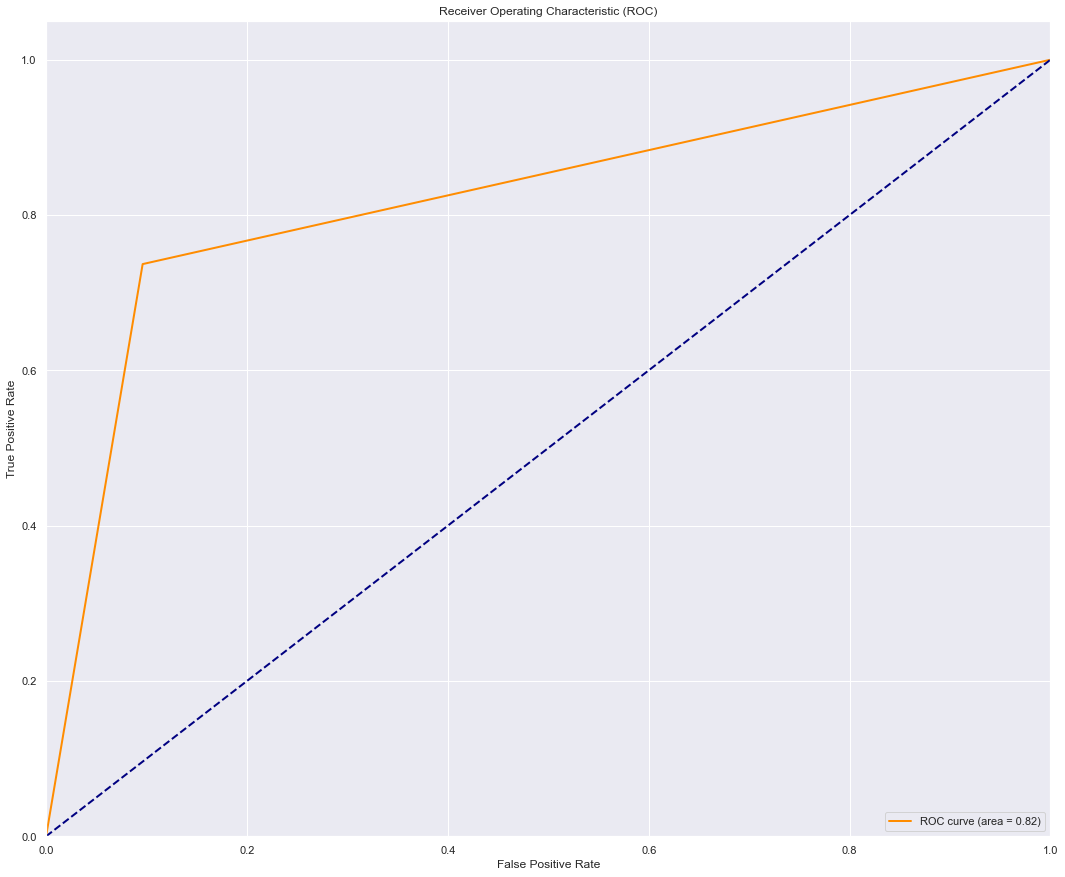

In [92]:
plt.figure()
plt.plot(fp, tp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_random_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### training the best model on the data

In [93]:
best_lr.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/umlt/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

In [94]:
y_pred_best_lr = best_lr.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred_best_lr))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        52
           1       0.85      0.74      0.79        38

    accuracy                           0.83        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.83      0.83      0.83        90



In [96]:
get_scores(y_test, y_pred_best_lr)

Sensitivity is: 0.7368421052631579
Specificity is: 0.9038461538461539
Positive predictive value is: 0.8484848484848485
Accuracy is: 0.8245614035087719


In [97]:
fp, tp, threshold = metrics.roc_curve(y_test, y_pred_best_lr)
roc_auc_best_lr = metrics.auc(fp, tp)
print("The area under the curve is: ", roc_auc_best_lr)

The area under the curve is:  0.8203441295546559


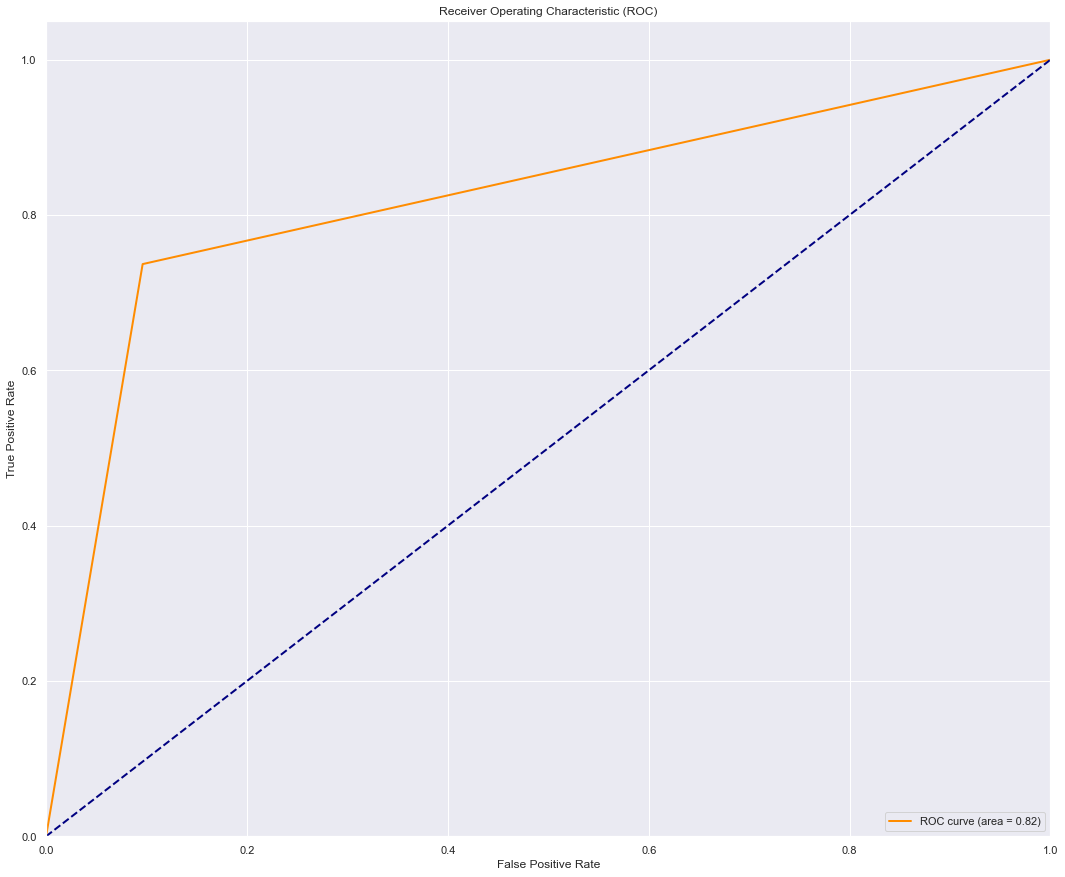

In [98]:
plt.figure()
plt.plot(fp, tp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_random_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Creating a dataframe of all the results

In [99]:
results = {'models' : ['Naive Bayes default', 
                       'Naive Bayes random', 
                       'Naive Bayes best',
                       'SVM default', 
                       'SVM random', 
                       'SVM best',
                       'Logistic Regression default', 
                       'Logistic Regression random',
                       'Logistic Regression best' ,
                       'Random Forest Classifier default', 
                       'Random Forest Classifier random',
                       'Random Forest Classifier best'],
           'area under the curve' : [roc_auc_default_nb, 
                                     None, 
                                     None,
                                     roc_auc_default_svm, 
                                     None,
                                     roc_auc_best_svm, 
                                     roc_auc_default_lr, 
                                     roc_auc_random_lr, 
                                     roc_auc_best_lr,
                                     roc_auc_default_rf, 
                                     roc_auc_random_rf,
                                     roc_auc_best_rf 
                                    ]}

df_results = pd.DataFrame(results)

print(df_results)


                              models  area under the curve
0                Naive Bayes default              0.613866
1                 Naive Bayes random                   NaN
2                   Naive Bayes best                   NaN
3                        SVM default              0.682692
4                         SVM random                   NaN
5                           SVM best              0.706478
6        Logistic Regression default              0.817814
7         Logistic Regression random              0.820344
8           Logistic Regression best              0.820344
9   Random Forest Classifier default              0.820344
10   Random Forest Classifier random              0.807186
11     Random Forest Classifier best              0.820344


In [100]:
# train the best param on the complete train dataset : because we have less data
# check if the results are worse : then algo not robust
# they should ideally be close to the current results
# get the results from the cross validation results and compare it with the current results

# look for the variablity of the 3 folds in the cross validation

# *** IMPORTANT: get the results for the individual classes from parc score from the best model ****
# understanding where the model fails

In [101]:
get_scores(y_test, parc_outcome_test)

Sensitivity is: 0.5263157894736842
Specificity is: 0.8653846153846154
Positive predictive value is: 0.7407407407407407
Accuracy is: 0.7142857142857143


In [102]:
# compare the parc values to the predicted values
get_scores(y_test, y_pred_random_lr)

Sensitivity is: 0.7368421052631579
Specificity is: 0.9038461538461539
Positive predictive value is: 0.8484848484848485
Accuracy is: 0.8245614035087719


In [103]:
type(X_train['ID'])

pandas.core.series.Series

In [ ]:
# lets divide the parc data into low, mid and high risk


MYTODO:

create the ensable of lr and rf 
separate into low, med and high risk
run the algo ensable and individually against the parc score

llm,
data


provide a linking platform bw the data aquisition platform, ml model and frontend

want the data aq platform to house the ml models in developement to able to ingest new data and perfrom
1. for a silent trial, be able to give the output label to each record
2. seamlesssly copmmunicate with the model and the front end
3. handle diff types of data